<a href="https://colab.research.google.com/github/jackiekuen2/notes-handson-ml-tf/blob/master/ch3_Exercises1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# a = []
# while(1):
#     a.append('1')

# 0: Get data

In [0]:
from sklearn.datasets import fetch_openml
import numpy as np

In [0]:
mnist = fetch_openml('mnist_784', version=1)
# mnist

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
X, y = mnist['data'], mnist['target']

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [0]:
# Change data type of y: string to integers
y = y.astype(np.uint8)

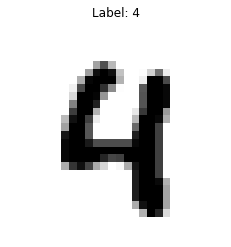

In [7]:
# Display hand-written digits
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

index = 616
some_digit = X[index]
some_digit_image = some_digit.reshape(28, 28)

some_digit_label = y[index]

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.title('Label: %s' % some_digit_label)
plt.show()

# 1: Split into training set and test set + Shuffling
- This data set is already shuffled

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


## Exercise1: Classifier >97% accuracy
- Find promising classifier
- Grid Search CV for hyperparameters tuning
- Save the best model to Google Drive

In [0]:
# 1. Try RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier()
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy',
                n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.1s finished


array([0.93676265, 0.93849692, 0.94144122])

In [0]:
# 2. Try K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy',
                n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 28.7min finished


array([0.96760648, 0.96704835, 0.96754513])

In [0]:
from sklearn.svm import LinearSVC

svc_clf = LinearSVC()
cross_val_score(svc_clf, X_train, y_train, cv=3, scoring='accuracy',
                n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.6min finished


array([0.84553089, 0.8300415 , 0.87873181])

Select KNN Classifier, for hyperparameters tuning

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()
param_grid = [{
    'weights': ['uniform', 'distance'], 
    'n_neighbors': [4, 5, 6]
    }]

grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy', 
                           verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 146.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid=[{'n_neighbors': [4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [0]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [0]:
# Training accuracy
grid_search.best_score_

0.9703333333333334

In [0]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [0]:
ch3_q1_bestmodel = grid_search.best_estimator_

In [0]:
# Back up the model
from sklearn.externals import joblib

joblib.dump(ch3_q1_bestmodel, "ch3_q1_bestmodel_knnclf.pkl")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['ch3_q1_bestmodel_knnclf.pkl']

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
joblib.dump(ch3_q1_bestmodel, "gdrive/My Drive/Colab Notebooks/Hands-on ML TF/ch3_q1_bestmodel_knnclf.pkl")

['gdrive/My Drive/Colab Notebooks/Hands-on ML TF/ch3_q1_bestmodel_knnclf.pkl']

In [0]:
# Testing grid-search's best model
test_index = 819
print("True test value: ", y_test[test_index])
print("Prediction: ", ch3_q1_bestmodel.predict(X_test[test_index].reshape(1,-1)))

True test value:  3
Prediction:  [3]


In [0]:
# Accuracy score from grid-search's best model
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)


In [0]:
print("First 10 true labels: ", y_test[:10])
print("First 10 predictions: ", y_pred[:10])

First 10 true labels:  [7 2 1 0 4 1 4 9 5 9]
First 10 predictions:  [7 2 1 0 4 1 4 9 5 9]


In [0]:
# Test accuracy
accuracy_score(y_test, y_pred)

0.9714

## Exercise 2: Data Augmentation
- Shift image by 1-2 pixels, in 4 directions

In [0]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode='constant')
    return shifted_image.reshape([-1])

Text(0.5, 1.0, 'Shifted right')

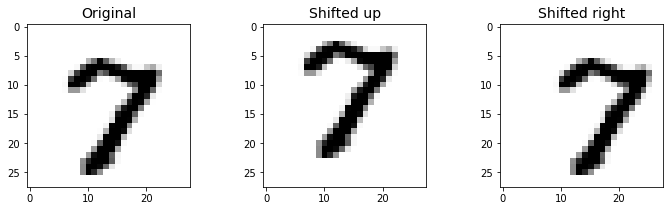

In [10]:
plt.figure(figsize=(12, 3))

# Orginal
plt.subplot(131)
plt.imshow(X[819].reshape(28,28), cmap="Greys", interpolation='nearest')
plt.title('Original', fontsize=14)

# Shift up
plt.subplot(132)
plt.imshow(shift_image(X[819], 0, -3).reshape(28,28), cmap="Greys", interpolation='nearest')
plt.title('Shifted up', fontsize=14)


# Shift right
plt.subplot(133)
plt.imshow(shift_image(X[819], 3, 0).reshape(28,28), cmap="Greys", interpolation='nearest')
plt.title('Shifted right', fontsize=14)

In [0]:
# Clone exisiting training sets to augumented sets
X_train_augumented = [image for image in X_train]
y_train_augumented = [label for label in y_train]

# Create 4 more augumented images (shifted by 3 pixels, in 4 directions), append to augumented sets
for dx, dy in ((3,0), (-3,0), (0,3), (0,-3)):
    for image, label in zip(X_train, y_train):
        shifted_image = shift_image(image, dx, dy)
        X_train_augumented.append(shifted_image)
        y_train_augumented.append(label)

# Transform into numpy arrays
X_train_augumented = np.array(X_train_augumented)
y_train_augumented = np.array(y_train_augumented)

In [12]:
# Size of new training data
print(X_train_augumented.shape)
print(y_train_augumented.shape)

(300000, 784)
(300000,)


In [0]:
def plot_digit(data):
    image = data.reshape((28, 28))
    plt.imshow(image, cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('on')
    plt.show()

In [14]:
# Before shuffling
y_train_augumented[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [0]:
# Shuffle AGAIN (!! New appened images are in order, they have to be shuffled before training)
shuffle_index = np.random.permutation(len(X_train_augumented))

X_train_augumented = X_train_augumented[shuffle_index]
y_train_augumented = y_train_augumented[shuffle_index]

In [16]:
# After shuffling
y_train_augumented[:5]

array([1, 5, 1, 8, 5], dtype=uint8)

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [18]:
# Retrieve model
from sklearn.externals import joblib

knn_clf = joblib.load('gdrive/My Drive/Colab Notebooks/Hands-on ML TF/ch3_q1_bestmodel_knnclf.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [19]:
# Fit augumented training sets to KNN classifier
# Using Ex 1 best model

# knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augumented, y_train_augumented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [0]:
# Validation accuracy
y_test_pred = knn_clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9686

In [23]:
joblib.dump(knn_clf, "gdrive/My Drive/Colab Notebooks/Hands-on ML TF/ch3_q2_knnclf.pkl")

['gdrive/My Drive/Colab Notebooks/Hands-on ML TF/ch3_q2_knnclf.pkl']